<a href="https://colab.research.google.com/github/SaraWestWA/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/SW_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



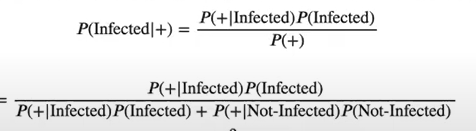

In [0]:
import pandas as pd
import numpy as np
# import scipy as

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

The Baysein proabability of A given B:

***P***(A|B)=***P***(B|A)* **P**(A)
**DIVIDED BY**
( ***P***(B|A)****P***(B) + ***P***(B|not A)****P***(not A) )

We begin knowing:

*   Probability of A & Not A (prior supposition)
*   Probability of B & False B


In [8]:
# calculation
prob_drunk = 0.001
prob_sober = 1- prob_drunk
prob_positive_if_drunk = 1
prob_positive_if_sober = 0.08

numerator = prob_positive_if_drunk*prob_drunk
denominator = numerator+(prob_positive_if_sober*(1-prob_drunk))
numerator/denominator


0.012357884330202669

In [8]:
# create a function to calculate the probability of being drunk with + test
prob_drunk = 0.001
prob_sober = 1- prob_drunk
prob_positive_if_drunk = 1
prob_positive_if_sober = 0.08


def prob_drunk_given_positive(prob_drunk, prob_positive_if_sober, prob_positive_if_drunk):
  numerator = prob_positive_if_drunk*prob_drunk
  denominator = numerator+(prob_positive_if_sober*(1-prob_drunk))
  x= numerator/denominator
  return x

prob_drunk_given_positive(0.001, 0.08, 1)


# numerator = (p_b_if_a)*p_a
# denominator = numerator + ((p_b_if_not_a)*(1-p_a)),
# p_a_if_b = numerator/denominator

# p_a_if_b


0.012357884330202669

In [41]:
# create a while loop to repeatedly calculate until the desired
# probability level & prepare arrays to make a table

count = 1
x = prob_drunk_given_positive(0.001, 0.08, 1)
print ('# tests: ',count)
print('prob of drunk:', x)
num_tests = [count]
prob_be_drunk=[x]
while x <0.95:
  x = prob_drunk_given_positive(x, 0.08, 1)
  count=count+1
  num_tests.append(count)
  prob_be_drunk.append(x)
  print ('# of breathalyzer tests: ',count)
  print('probability of being drunk:', x)

print(num_tests)
print(prob_be_drunk)



# tests:  1
prob of drunk: 0.012357884330202669
# of breathalyzer tests:  2
probability of being drunk: 0.13525210993291495
# of breathalyzer tests:  3
probability of being drunk: 0.6615996951348605
# of breathalyzer tests:  4
probability of being drunk: 0.9606895076105054
[1, 2, 3, 4]
[0.012357884330202669, 0.13525210993291495, 0.6615996951348605, 0.9606895076105054]


In [39]:
# Make a table to display the information
drunk_test_df = pd.DataFrame(
    [num_tests,
    prob_be_drunk],
    index =['# of breathalyzer tests','probability of being drunk'])

drunk_test_df

,0,1,2,3
# of breathalyzer tests,1.000000,2.000000,3.0000,4.00000
probability of being drunk,0.012358,0.135252,0.6616,0.96069


In [42]:
# Make a table to display the information
drunk_test_df = pd.DataFrame(
    [num_tests,
    prob_be_drunk],
    index =['# of breathalyzer tests','probability of being drunk']).T

drunk_test_df

,# of breathalyzer tests,probability of being drunk
0,1.0,0.012358
1,2.0,0.135252
2,3.0,0.661600
3,4.0,0.960690


### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)


###3) In your own words, summarize the difference between Bayesian and Frequentist statistics -->
If you're unsure where to start, check out this blog post of Bayes theorem with Python.

Frequentist statistics relys upon measured samples. It is based upon the presumtion that the data, given a large enough sample, will fall into a normal curve. All information is drawn based upon the sample being used.

Bayesian statistics relys upon information that can be "known" before making calcultions.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!